## Dataset Overview
This dataset provides credit related data for loans that were issued in 2018 by a unspecified institution. 

The dataset contains 855969 observations across 73 columns and can be found at the following link:

https://www.kaggle.com/manishpthakur/pythonproject

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE


%matplotlib inline

## Load the dataset in and run data discovery steps

In [2]:
Credit = pd.read_csv('data/CreditRisk.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Credit.shape

(855969, 73)

In [5]:
Credit.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [6]:
pd.options.display.max_rows = 999
Credit.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
Credit.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


## Exploratory Analysis (Univariate and Bivariate)

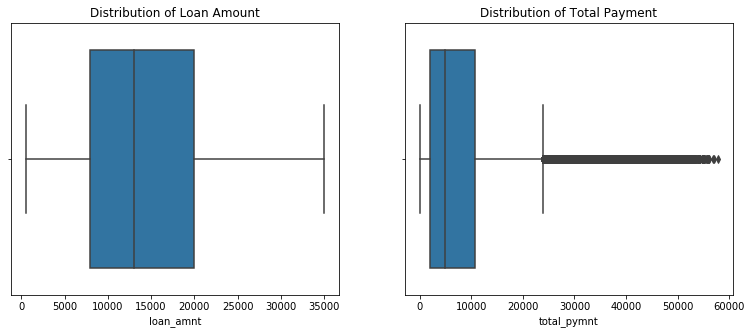

count    855969.000000
mean      14745.571335
std        8425.340005
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64
count    855969.000000
mean       7653.296336
std        7909.383591
min           0.000000
25%        1969.690000
50%        4976.160000
75%       10744.803650
max       57777.579870
Name: total_pymnt, dtype: float64


In [10]:
# Start with loan_amnt and total_pymnt

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.boxplot(x=Credit["loan_amnt"])
plt.title('Distribution of Loan Amount')

plt.subplot(1,3,2)
sns.boxplot(x=Credit["total_pymnt"])
plt.title('Distribution of Total Payment')
plt.show()

print(Credit['loan_amnt'].describe())
print(Credit['total_pymnt'].describe())

count    8.559690e+05
mean     7.507119e+04
std      6.426447e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64


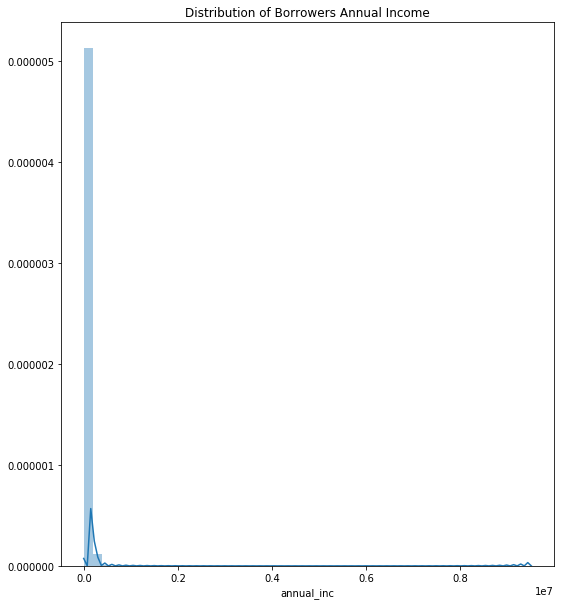

In [23]:
#Next look at borrowers annual income

plt.figure(figsize=[30,10])

plt.subplot(1,3,1)
sns.distplot(Credit['annual_inc'].dropna())
plt.title('Distribution of Borrowers Annual Income')
print(Credit['annual_inc'].describe())

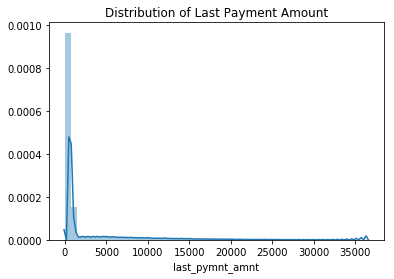

count    855969.000000
mean       2225.985295
std        4864.966593
min           0.000000
25%         285.420000
50%         468.820000
75%         849.160000
max       36475.590000
Name: last_pymnt_amnt, dtype: float64


In [14]:
#Next, look at last payment amount

sns.distplot(Credit['last_pymnt_amnt'].dropna())
plt.title('Distribution of Last Payment Amount')
plt.show()
print(Credit['last_pymnt_amnt'].describe())

#### Will need to remove right skewness due to extreme outlier in data cleaning section. If you look at the describe method results, you'll see a maximum of 36475, when 75% of the data is under 849.

Text(0.5,1,'Distribution of Revolving Balance')

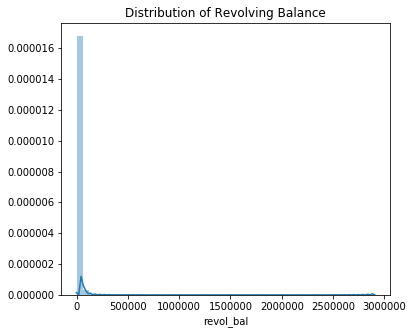

In [17]:
#Next look at Revolving Balance

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(Credit['revol_bal'].dropna())
plt.title('Distribution of Revolving Balance')


Text(0.5,1,'Distribution of Total Received Interest')

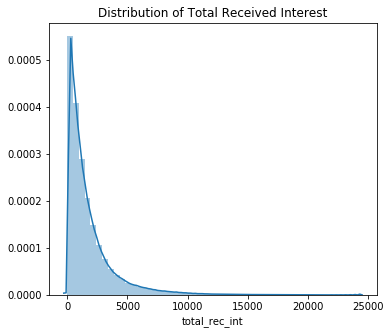

In [19]:
# Next look at Total Received Interest

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(Credit['total_rec_int'].dropna())
plt.title('Distribution of Total Received Interest')

Text(0.5,1,'Distribution of Total Received Principle')

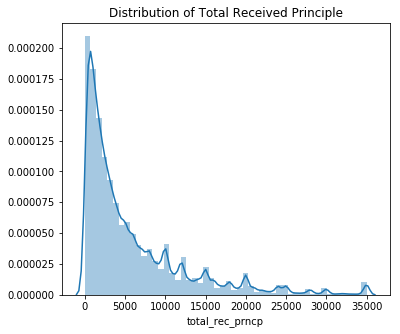

In [20]:
# Next look at Total Received Principle

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(Credit['total_rec_prncp'].dropna())
plt.title('Distribution of Total Received Principle')

Text(0.5,1,'Distribution of Total Received Late Fees')

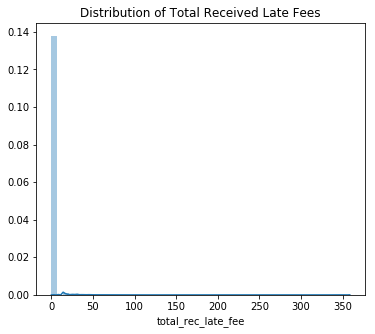

In [21]:
# Next look at Total Received Late Fees

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(Credit['total_rec_late_fee'].dropna())
plt.title('Distribution of Total Received Late Fees')

Text(0.5,1,'Distribution of Total Recoveries')

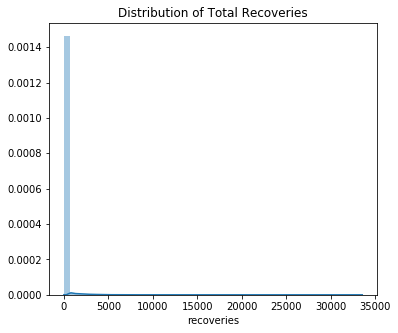

In [22]:
# Next look at Total Recoveries

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(Credit['recoveries'].dropna())
plt.title('Distribution of Total Recoveries')

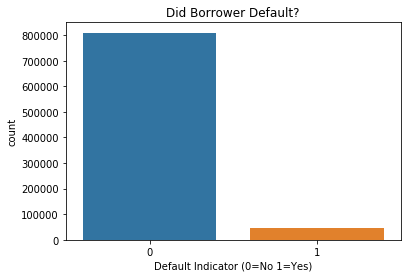

In [25]:
#Now look at Rain Today and whether or not it rained the next day (Rain Tomorrow)
sns.countplot(x='default_ind', data=Credit)
plt.title('Did Borrower Default?')
plt.xlabel('Default Indicator (0=No 1=Yes)')
plt.show()

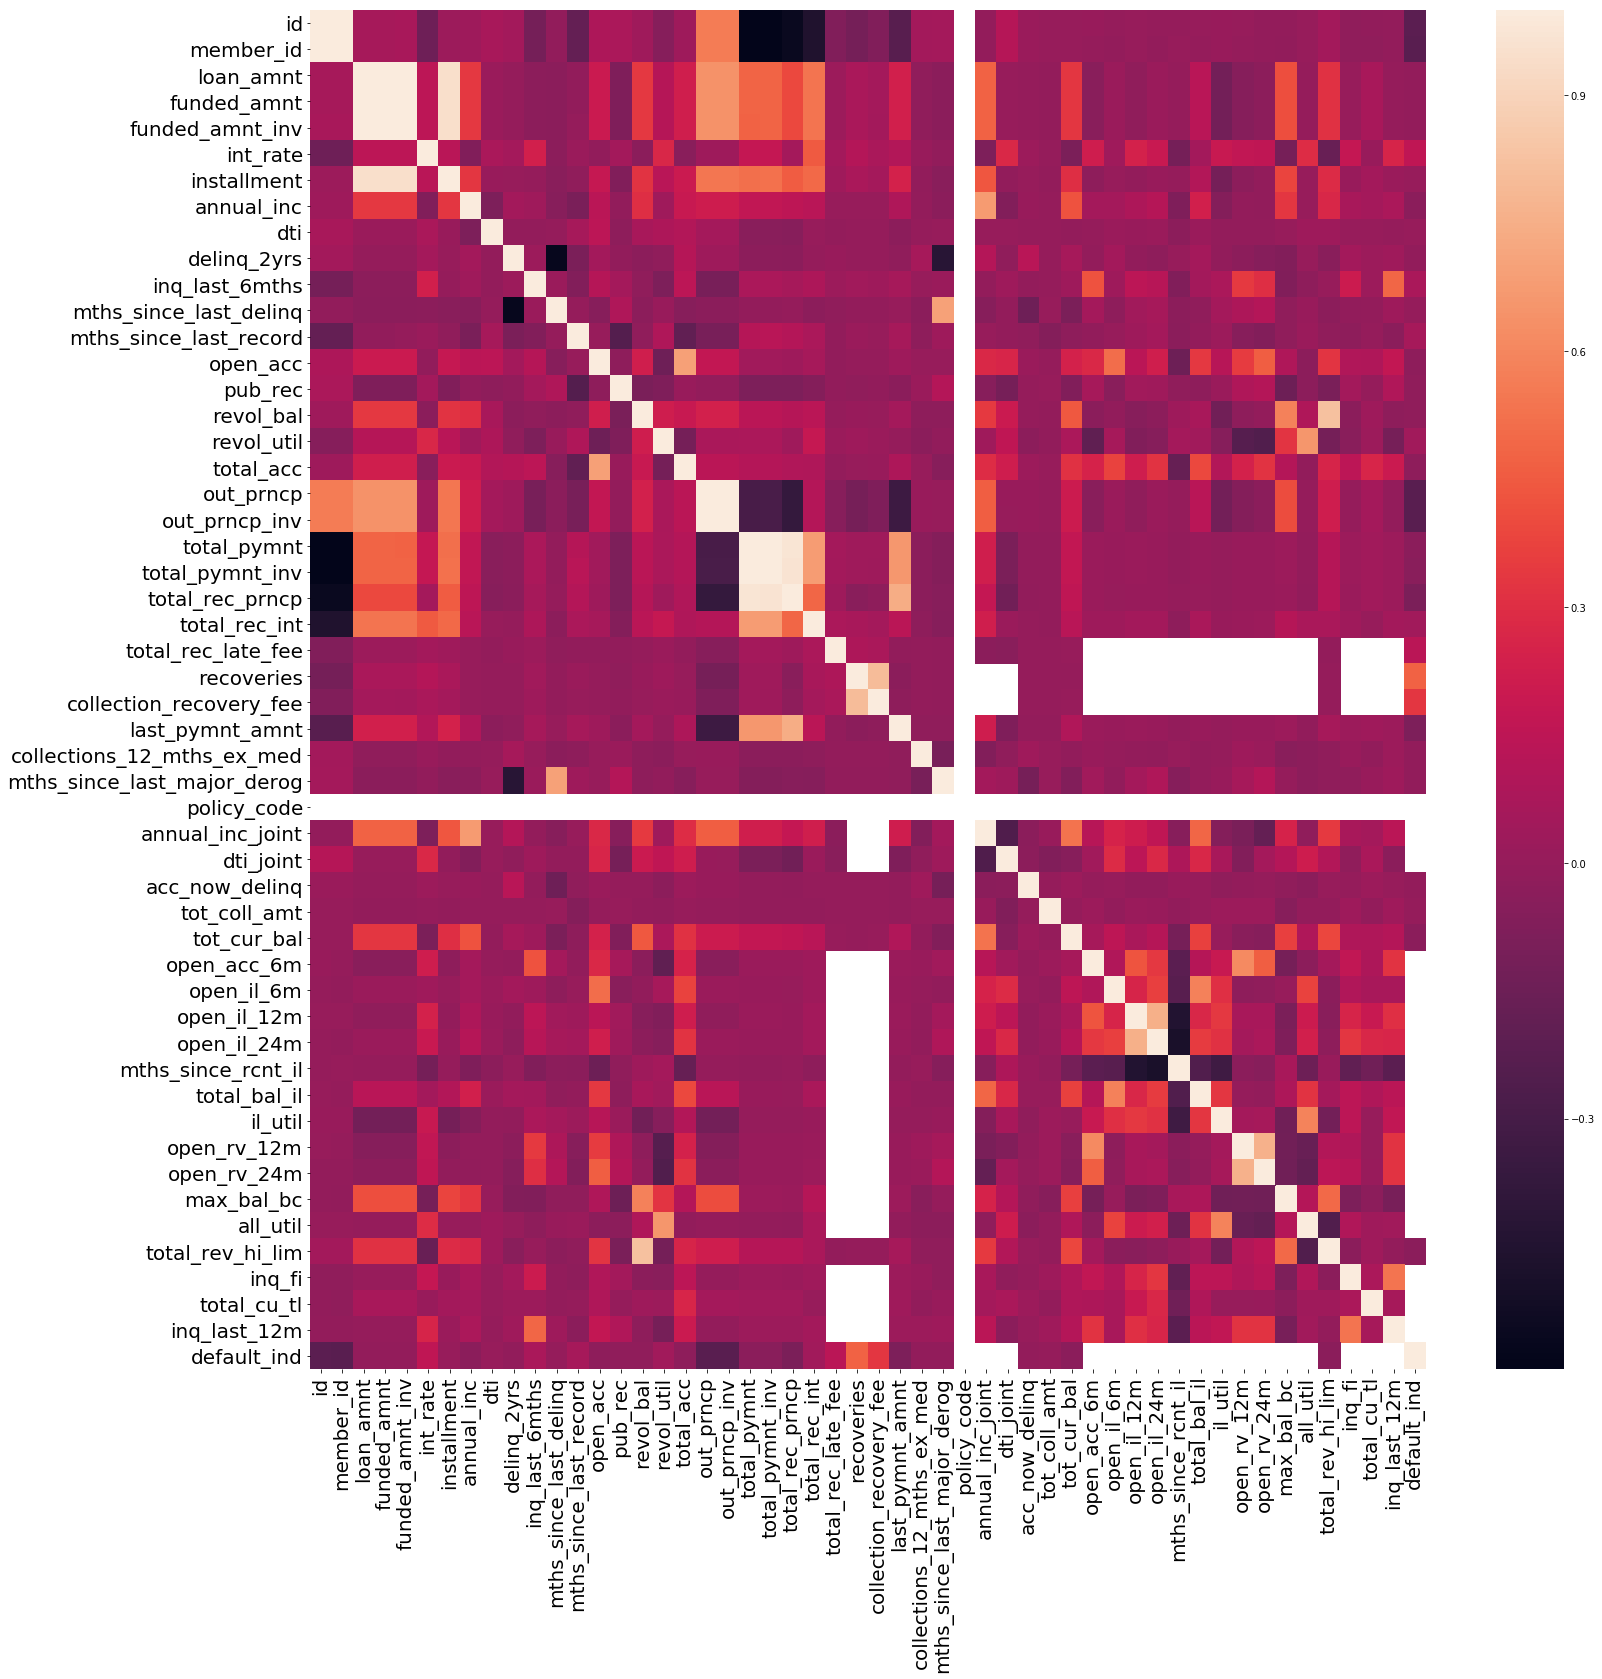

In [26]:
#Correlation matrix with sns.heatmap

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(Credit.corr())
plt.xticks(size=20)
plt.yticks(size=20, rotation='horizontal')
plt.show()


In [27]:
#Determine missing values across dataframe

missing_values_count = Credit.isnull().sum()
print(missing_values_count)

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [28]:
#Due to the magnitude of missing values, in order to not harm the integrity of the data, 
#we will simply drop all NaNs for the time being.

Credit = Credit.dropna()

# Feature Selection / Engineering